In [1]:
import dask.dataframe as dd

# Read CSV using Dask
data = dd.read_csv("E:/semester8/Grad2/dataset_after_oversampling/multi_classification.csv")

# Use .compute() to execute operations and get the information
data_info = data.compute().info()
print(data_info)

# Get the number of rows and columns using .compute()
num_rows, num_columns = data.compute().shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 42263771 entries, 0 to 381750
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TP2              float64
 1   TP3              float64
 2   H1               float64
 3   DV_pressure      float64
 4   Reservoirs       float64
 5   Oil_temperature  float64
 6   Flowmeter        float64
 7   Motor_current    float64
 8   COMP             int64  
 9   DV_eletric       int64  
 10  Towers           int64  
 11  MPG              int64  
 12  LPS              int64  
 13  Pressure_switch  int64  
 14  Oil_level        int64  
 15  Caudal_impulses  int64  
 16  gpsLong          float64
 17  gpsLat           float64
 18  gpsSpeed         int64  
 19  gpsQuality       int64  
 20  status           int64  
dtypes: float64(10), int64(11)
memory usage: 6.9 GB
None
Number of rows: 42263771
Number of columns: 21


In [2]:
import pandas as pd
pandas_data = data.compute()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt



In [4]:
label_column = 'status'
X = pandas_data.drop(label_column, axis=1)
y = pandas_data[label_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print(pandas_data.head())

Train set shape: (29584639, 20) (29584639,)
Test set shape: (12679132, 20) (12679132,)
     TP2    TP3     H1  DV_pressure  Reservoirs  Oil_temperature  Flowmeter  \
0 -0.012  9.758  9.760       -0.028       1.576           63.350  19.049625   
1 -0.012  9.760  9.760       -0.028       1.578           63.250  19.049625   
2 -0.010  9.760  9.760       -0.028       1.578           63.325  19.040281   
3 -0.012  9.756  9.756       -0.030       1.576           63.200  19.040281   
4 -0.012  9.756  9.756       -0.030       1.578           63.150  19.049625   

   Motor_current  COMP  DV_eletric  ...  MPG  LPS  Pressure_switch  Oil_level  \
0         3.9550     1           0  ...    1    0                0          0   
1         4.0275     1           0  ...    1    0                0          0   
2         3.9450     1           0  ...    1    0                0          0   
3         3.9300     1           0  ...    1    0                0          0   
4         3.9950     1           

In [5]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

START Train-----
END Train------

 Time taken: 101 hours 2 minutes and 20.18 seconds.
Best Gradient Boosting Model saved as gradient_boosting_model_multi_classification.joblib

 Time taken: 0 hours 5 minutes and 16.1 seconds.

Best Gradient Boosting Classifier:
Accuracy: 0.9952457313323972

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   3168796
           1       1.00      1.00      1.00   3167555
           2       1.00      1.00      1.00   3167677
           3       0.99      0.99      0.99   3175104

    accuracy                           1.00  12679132
   macro avg       1.00      1.00      1.00  12679132
weighted avg       1.00      1.00      1.00  12679132



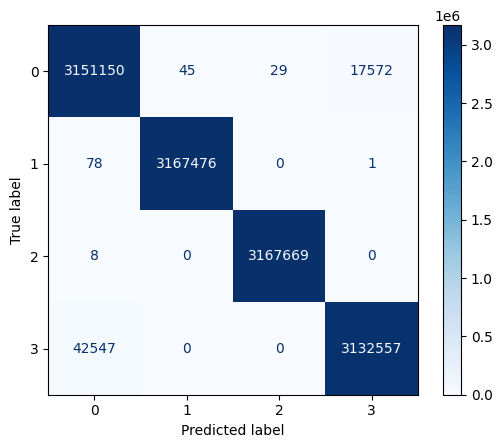

In [6]:
from datetime import datetime
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the Gradient Boosting Classifier with specific hyperparameters
best_gb_model = GradientBoostingClassifier(
    learning_rate=0.3,
    n_estimators=100,  # Adjust as needed
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    max_features=None,
    random_state=42,
)

# Start the timer for model training
start_time_train = timer()
print("START Train-----")
# Train the model on the training dataset
best_gb_model.fit(X_train, y_train)
print("END Train------")

# Stop the timer for model training and print the elapsed time
timer(start_time_train)

# Save the trained model to a file
best_gb_model_filename = 'gradient_boosting_model_multi_classification.joblib'
joblib.dump(best_gb_model, best_gb_model_filename)
print(f"Best Gradient Boosting Model saved as {best_gb_model_filename}")

# Start the timer for model evaluation
start_time_eval = timer()

# Evaluate the best model on the test set
y_pred_best_gb = best_gb_model.predict(X_test)

# Stop the timer for model evaluation and print the elapsed time
timer(start_time_eval)

# Evaluate the best model on the test set
accuracy_best_gb = accuracy_score(y_test, y_pred_best_gb)

# Print results
print("\nBest Gradient Boosting Classifier:")
print("Accuracy:", accuracy_best_gb)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_gb))

# Display confusion matrix
conf_matrix_best_gb = confusion_matrix(y_test, y_pred_best_gb)
disp_best_gb = ConfusionMatrixDisplay(conf_matrix_best_gb, display_labels=best_gb_model.classes_)
disp_best_gb.plot(cmap='Blues', values_format='d')
plt.show()


In [7]:
import joblib
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Step 1: Load the Model
model_filename = 'gradient_boosting_model_multi_classification.joblib'
model = joblib.load(model_filename)

# Step 2: Evaluate on Training Set
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {train_accuracy}')
print('Classification Report on Training Set:')
print(classification_report(y_train, train_predictions))

# Step 3: Evaluate on Test Set
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy}')
print('Classification Report on Test Set:')
print(classification_report(y_test, test_predictions))



Training Accuracy: 0.9968953820933898
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99   7392686
           1       1.00      1.00      1.00   7393758
           2       1.00      1.00      1.00   7393412
           3       1.00      0.99      0.99   7404783

    accuracy                           1.00  29584639
   macro avg       1.00      1.00      1.00  29584639
weighted avg       1.00      1.00      1.00  29584639

Test Accuracy: 0.9952457313323972
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   3168796
           1       1.00      1.00      1.00   3167555
           2       1.00      1.00      1.00   3167677
           3       0.99      0.99      0.99   3175104

    accuracy                           1.00  12679132
   macro avg       1.00      1.00      1.00  12679132
weighted avg       1.00      1.00      

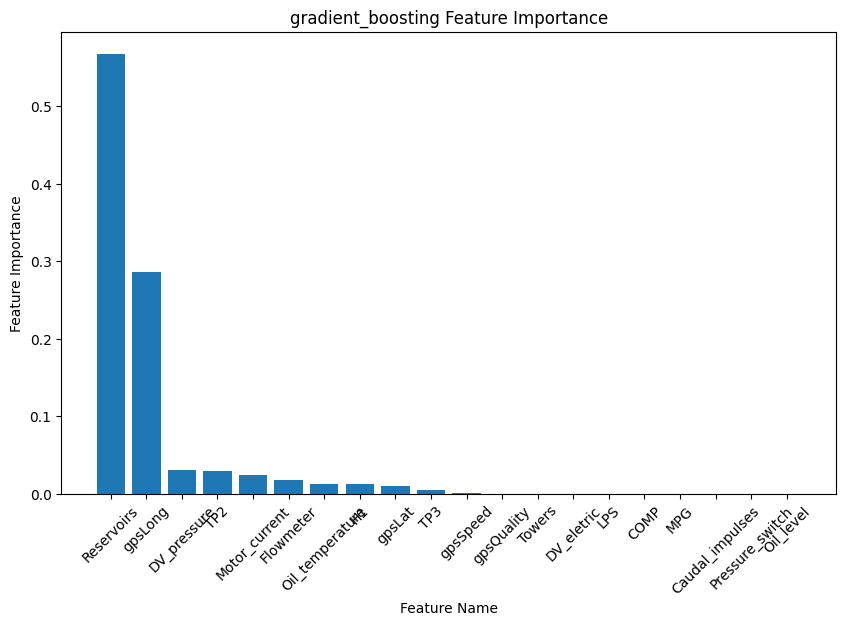

In [9]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve

# Assuming X_train, X_test, y_train, y_test are already defined
# Assuming you have a dataset with a column named "feature_names"

# Define column names
column_names = [
    'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 
    'Flowmeter', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 
    'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses','gpsLong','gpsLat','gpsSpeed','gpsQuality', 'status'
]

# Step 1: Load the Random Forest Model
model_filename ='gradient_boosting_model_multi_classification.joblib'
model = joblib.load(model_filename)

# Step 2: Get Feature Importance
feature_importance = model.feature_importances_

# Step 3: Visualize Feature Importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot the feature importances with feature names
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), [column_names[i] for i in sorted_idx], rotation=45)
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('gradient_boosting Feature Importance')
plt.show()


In [10]:
# Print feature names and their importance values
for feature, importance in zip([column_names[i] for i in sorted_idx], feature_importance[sorted_idx]):
    print(f"{feature}: {importance}")

Reservoirs: 0.5675565110836749
gpsLong: 0.2860404328046096
DV_pressure: 0.030866757436195314
TP2: 0.029615732810504048
Motor_current: 0.024748791715506556
Flowmeter: 0.017993963922160766
Oil_temperature: 0.012965511130071683
H1: 0.012713724315732481
gpsLat: 0.009786407104971834
TP3: 0.005512618393994493
gpsSpeed: 0.0016607072087088148
gpsQuality: 0.00027202279509225795
Towers: 0.00012392368092703444
DV_eletric: 0.00010817147007931112
LPS: 1.636658505807214e-05
COMP: 1.3302370416435222e-05
MPG: 5.054750253358172e-06
Caudal_impulses: 4.2204301849573725e-10
Pressure_switch: 0.0
Oil_level: 0.0
